In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

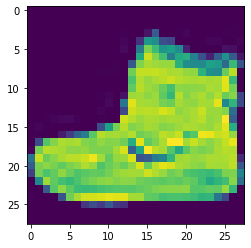

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

##Design a model

- **Sequential** defines a sequence of layers in the neural network.
- **Flatten** takes a square and turns it into a one-dimensional vector.
Dense adds a layer of neurons.
- **Activation** functions tell each layer of neurons what to do. There are lots of options, but use these for now:
- **Relu** effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
- **Softmax** takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

In [25]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

##Compile and train the model

In [27]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5834 - accuracy: 0.7929
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3645 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3244 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2975 - accuracy: 0.8890
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2784 - accuracy: 0.8943


In [28]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_14 (Dense)             (32, 512)                 401920    
_________________________________________________________________
dense_15 (Dense)             (32, 128)                 65664     
_________________________________________________________________
dense_16 (Dense)             (32, 10)                  1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


##Test the model

In [29]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.8718


[0.36450719833374023, 0.8718000054359436]

In [30]:
classifications = model.predict(test_images)
print(classifications[0])

[7.8003791e-07 2.5683483e-05 1.1144969e-05 7.3020542e-06 1.9531835e-06
 1.5929302e-02 1.7317934e-06 1.0526202e-02 7.4626955e-06 9.7348851e-01]


In [31]:
print(test_labels[0])

9


##Remove normalization

```
Accuracy is decreased
```



In [32]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 14.1552
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5250
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4946
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4872
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5252
[3.3946462e-18 3.5906868e-12 1.1748659e-16 6.1195020e-14 6.6172311e-24
 2.3825075e-03 1.8122963e-17 9.0617267e-03 3.5534444e-13 9.8855573e-01]
9


##Callback when the accuracy reaches 95%

In [36]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=100, callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5843 - accuracy: 0.7937
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3698 - accuracy: 0.8659
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3267 - accuracy: 0.8770
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2976 - accuracy: 0.8910
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2755 - accuracy: 0.8970
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2606 - accuracy: 0.9035
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2534 - accuracy: 0.9057
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2299 - accuracy: 0.9137
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2193 - accuracy: 0.9188
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l